# **Quiz de Análisis Exploratorio de Datos (AED) -Dataset de Pingüinos-**

## **Introducción**
El dataset de pingüinos de Palmer Station Antarctica LTER es un conjunto de datos ampliamente utilizado en análisis de datos y aprendizaje automático. Contiene información sobre tres especies de pingüinos (Adelie, Chinstrap y Gentoo) recolectada en tres islas diferentes de la Antártida. Incluye variables como el tamaño del pico, la longitud de las aletas y la masa corporal, lo que lo convierte en un excelente recurso para explorar tendencias, relaciones y patrones en los datos.

En este taller, llevarán a cabo un Análisis Exploratorio de Datos (AED) para responder preguntas clave y visualizar la información de manera efectiva.

---

## **Objetivo**
Aplicar técnicas de exploración de datos utilizando Python para responder preguntas concretas sobre el dataset de pingüinos y representar los hallazgos mediante visualizaciones gráficas.

---

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 7.3 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.0 MB 26.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 28.5 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 12.8/12.8 MB 81.3 MB/s  0:00:00

   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- --

In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 28.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 92.3 MB/s  0:00:00

   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   --------------- ------------------------ 3/8 [fonttools]
   --------------- ------------------------ 3/8 [fonttools]
   -------

In [4]:
!pip install matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
pinguinos = sns.load_dataset("penguins")
pinguinos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## **Preguntas para el Análisis Exploratorio de Datos**
1. ¿Cuántos pingüinos de cada especie hay en el dataset? Representa los resultados en un gráfico de barras.

In [ ]:
# Cantidad de pingüinos por especie
especies = pinguinos['species'].value_counts()
print(especies)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


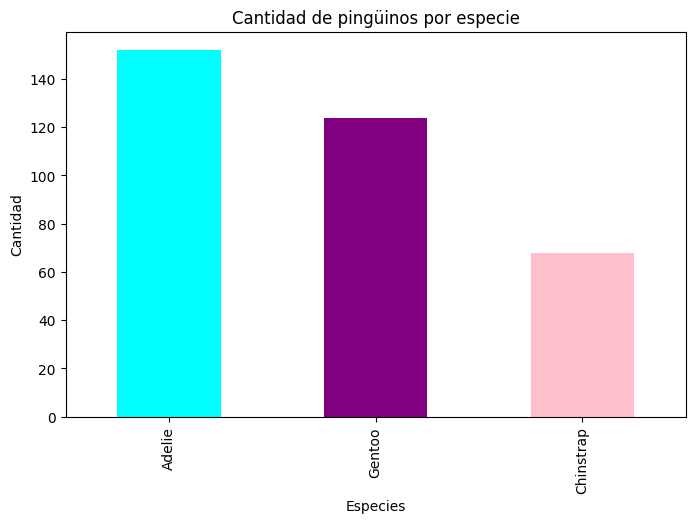

In [ ]:
# Gráfico de barras para la cantidad de pingüinos por especie
plt.figure(figsize=(8, 5))
especies.plot(kind='bar', color=['cyan', 'purple', 'pink'])
plt.title('Cantidad de pingüinos por especie')
plt.xlabel('Especies')
plt.ylabel('Cantidad')
plt.show()

2. ¿Cuál es la distribución de pingüinos en cada isla? ¿Existe alguna especie predominante en cada isla? Visualiza la información en un gráfico de barras o pastel.

In [ ]:
#  Cantidad de pingüinos por isla
islas = pinguinos['island'].value_counts()
print(islas)


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


In [12]:
islas_especie = pinguinos.groupby(['island', 'species']).size().unstack()
print(islas_especie)

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe       44.0        NaN   124.0
Dream        56.0       68.0     NaN
Torgersen    52.0        NaN     NaN


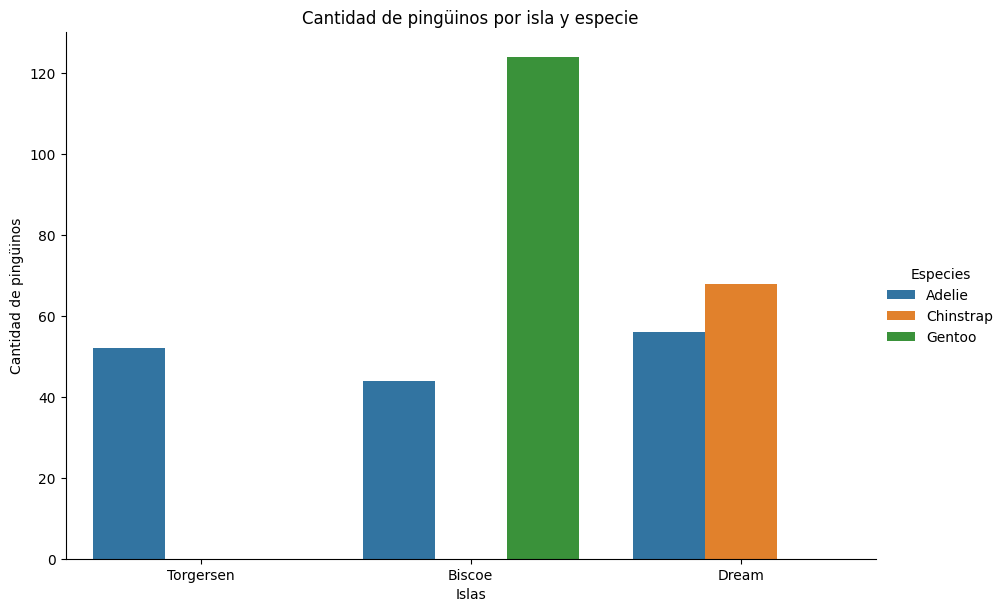

In [13]:
g = sns.catplot(x='island', hue='species', data=pinguinos, kind='count', height=6, aspect=1.5)
g.set_axis_labels("Islas", "Cantidad de pingüinos")
g._legend.set_title('Especies')
plt.title('Cantidad de pingüinos por isla y especie')
plt.show()

3. ¿Hay valores nulos en el dataset? ¿Cómo podrían manejarse para evitar sesgos en el análisis? Representa los valores nulos en un mapa de calor.

In [ ]:
# Verificar valores nulos en el dataset
valores_nulos = pinguinos.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)

Valores nulos por columna:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


4. ¿Cómo varía la masa corporal entre las diferentes especies? Utiliza un gráfico de violín o de cajas para comparar las distribuciones.

C:\Users\FCMN\AppData\Local\Temp\ipykernel_14260\3385742149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=pinguinos, palette='pastel')


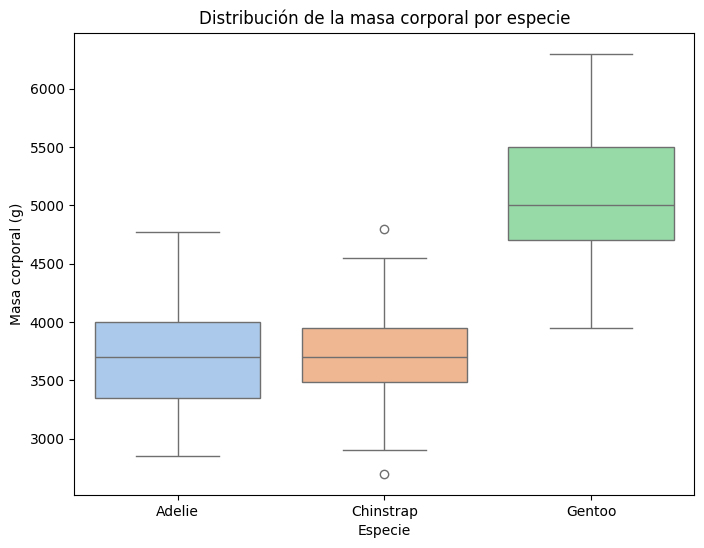

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='body_mass_g', data=pinguinos, palette='pastel')
plt.title('Distribución de la masa corporal por especie')
plt.xlabel('Especie')
plt.ylabel('Masa corporal (g)')
plt.show()

5. ¿Existe una correlación entre la longitud de la aleta y la masa corporal? Representa la relación en un gráfico de dispersión con una línea de tendencia.

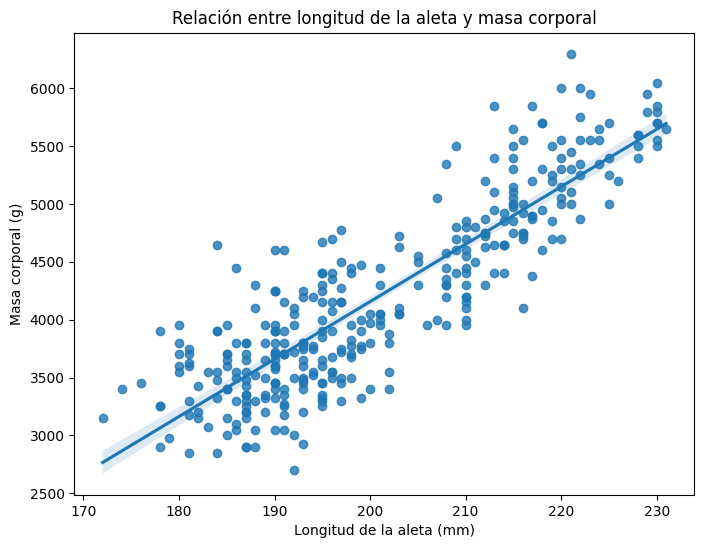

In [21]:
plt.figure(figsize=(8, 6))
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=pinguinos)
plt.title('Relación entre longitud de la aleta y masa corporal')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

6. ¿Los pingüinos machos y hembras presentan diferencias en la masa corporal? Justifica tu respuesta utilizando un gráfico de cajas.

C:\Users\FCMN\AppData\Local\Temp\ipykernel_14260\2191618183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='body_mass_g', data=pinguinos, palette='Set2')


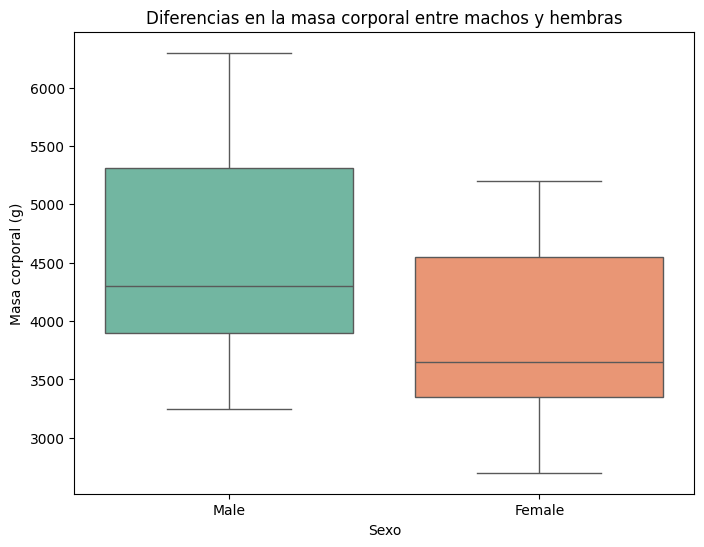

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='body_mass_g', data=pinguinos, palette='Set2')
plt.title('Diferencias en la masa corporal entre machos y hembras')
plt.xlabel('Sexo')
plt.ylabel('Masa corporal (g)')
plt.show()

7. ¿Cuál de las tres especies tiene los picos más largos? Representa la distribución de esta variable con un histograma o un gráfico de cajas.

C:\Users\FCMN\AppData\Local\Temp\ipykernel_14260\709339126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='bill_length_mm', data=pinguinos, palette='Set3')


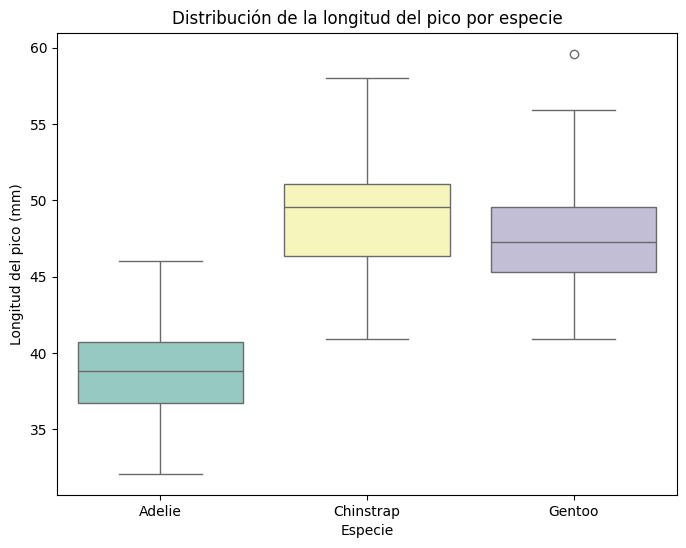

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_length_mm', data=pinguinos, palette='Set3')
plt.title('Distribución de la longitud del pico por especie')
plt.xlabel('Especie')
plt.ylabel('Longitud del pico (mm)')
plt.show()

8. ¿Podemos encontrar alguna relación entre la longitud del pico y la profundidad del mismo? Representa la relación en un gráfico de dispersión.

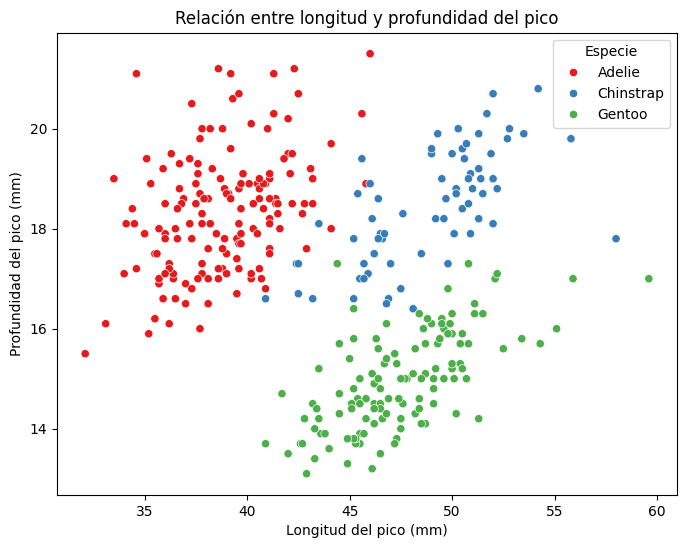

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=pinguinos, palette='Set1')
plt.title('Relación entre longitud y profundidad del pico')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Profundidad del pico (mm)')
plt.legend(title='Especie')
plt.show()

9. ¿Cómo podrías identificar posibles valores atípicos en el dataset? Usa un boxplot para detectar valores atípicos en una variable de tu elección.

C:\Users\FCMN\AppData\Local\Temp\ipykernel_14260\812782667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='bill_length_mm', data=pinguinos, palette='coolwarm')


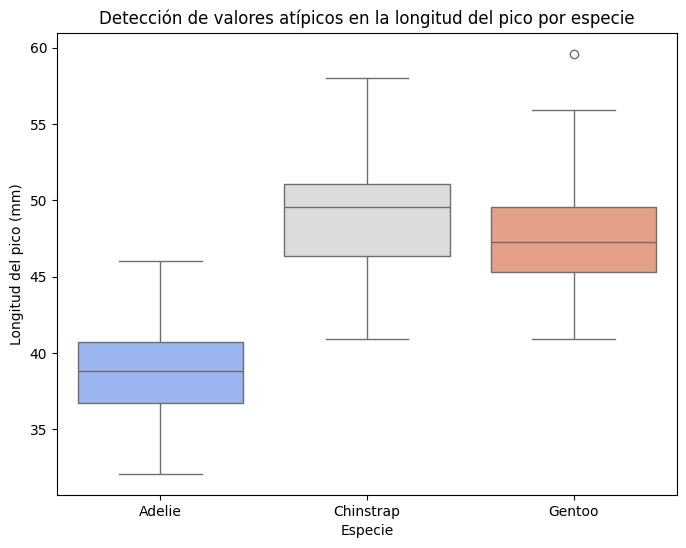

In [35]:
# Boxplot para identificar valores atípicos en la longitud del pico (bill_length_mm)
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_length_mm', data=pinguinos, palette='coolwarm')
plt.title('Detección de valores atípicos en la longitud del pico por especie')
plt.xlabel('Especie')
plt.ylabel('Longitud del pico (mm)')
plt.show()

10. ¿Qué otro tipo de análisis exploratorio podrías realizar con estos datos para extraer más información? Proponlo y visualízalo mediante gráficos adecuados.

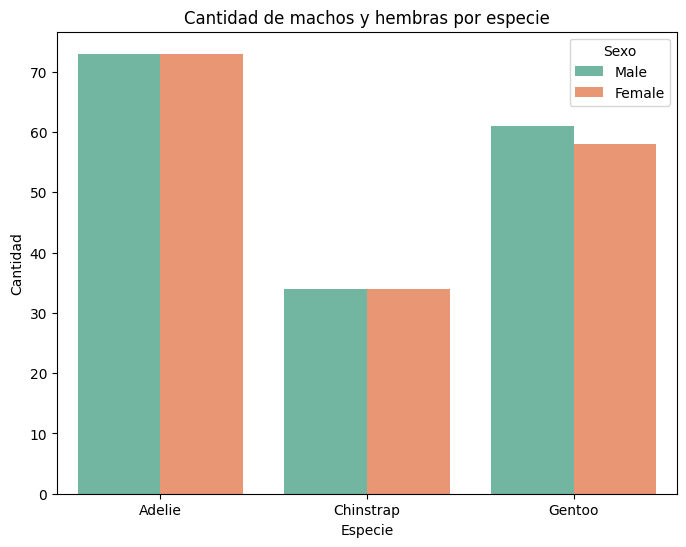

In [36]:
# Histograma comparando la cantidad de machos y hembras por especie
plt.figure(figsize=(8, 6))
sns.countplot(x='species', hue='sex', data=pinguinos, palette='Set2')
plt.title('Cantidad de machos y hembras por especie')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.legend(title='Sexo')
plt.show()


---

## **Actividad Final**
Responde las siguientes preguntas en un informe corto:
1. ¿Cuáles son los hallazgos más importantes de este análisis?
2. ¿Cómo mejorarías la limpieza y preparación de los datos?
3. ¿Qué otros análisis o visualizaciones podrías realizar para obtener más información?